In [13]:
pip install torch==2.0.0 torchvision==0.15.1

Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install d2l==1.0.3

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

data = pd.read_csv('METLIN_CCS_vectorfingerprintsVectorized.csv', nrows = 50)
print(data)

                                        Molecule Name Molecular Formula  \
0   3-[3-(2,3-dihydroindol-1-yl)propyl]-1-[(4-fluo...        C19H22FN3O   
1   3-{[1,1'-biphenyl]-4-ylmethylidene}-6-fluoro-2...        C22H15FO3S   
2   1-{[3-(4-methoxyphenyl)-1,2,4-oxadiazol-5-yl]m...        C25H28N4O3   
3   3-[2-oxo-2-(4-phenylmethanesulfonylpiperazin-1...       C22H30N4O5S   
4   2-{[1,1'-biphenyl]-2-ylamino}-1-(morpholin-4-y...        C18H20N2O2   
5   1-(2-{[1,1'-biphenyl]-2-ylamino}acetyl)imidazo...        C17H17N3O2   
6   N-(2,3-dihydro-1,4-benzodioxin-6-yl)-2-{[1-(4-...      C23H21N5O3S2   
7                                              Tm_322                     
8   N-[(1-benzyl-3,5-dimethylpyrazol-4-yl)methyl]-...       C24H25N5O2S   
9   N-{[1,1'-biphenyl]-4-yl}-2-(2-oxoquinoxalin-1-...        C22H17N3O2   
10                                             Tm_322                     
11  N-(4-ethoxyphenyl)-2-{2-[5-(4-methylphenyl)-1,...        C25H24N6O3   
12                       

In [2]:
print(data.iloc[:, [10,13]])

   Adduct  Dimer.1
0   [M+H]  Monomer
1   [M+H]  Monomer
2   [M+H]  Monomer
3   [M+H]  Monomer
4   [M+H]  Monomer
5   [M+H]  Monomer
6   [M+H]  Monomer
7   [M+H]  Monomer
8   [M+H]  Monomer
9   [M+H]  Monomer
10  [M+H]  Monomer
11  [M+H]  Monomer
12  [M+H]  Monomer
13  [M+H]    Dimer
14  [M+H]  Monomer
15  [M+H]  Monomer
16  [M+H]  Monomer
17  [M+H]  Monomer
18  [M+H]  Monomer
19  [M+H]  Monomer
20  [M+H]    Dimer
21  [M+H]  Monomer
22  [M+H]  Monomer
23  [M+H]  Monomer
24  [M+H]  Monomer
25  [M+H]  Monomer
26  [M+H]  Monomer
27  [M+H]  Monomer
28  [M+H]  Monomer
29  [M+H]  Monomer
30  [M+H]  Monomer
31  [M+H]  Monomer
32  [M+H]  Monomer
33  [M+H]  Monomer
34  [M+H]  Monomer
35  [M+H]  Monomer
36  [M+H]  Monomer
37  [M+H]  Monomer
38  [M+H]  Monomer
39  [M+H]  Monomer
40  [M+H]  Monomer
41  [M+H]  Monomer
42  [M+H]  Monomer
43  [M+H]  Monomer
44  [M+H]  Monomer
45  [M+H]  Monomer
46  [M+H]  Monomer
47  [M+H]  Monomer
48  [M+H]  Monomer
49  [M+H]  Monomer


In [3]:
import torch 

#inputs, label = data.iloc[:, [9, 10, 13, 18]], data.iloc[:, 7]
#print(inputs, label)
target = torch.tensor(data.iloc[:, 7].to_numpy(dtype=float)) #CCS_AVG
print(target)

tensor([176.6300, 192.2600, 211.1200, 204.2200, 174.4700, 170.1700, 215.2400,
        154.2200, 198.4900, 195.7500, 154.8100, 214.9700, 205.0000, 263.1500,
        204.5300, 211.8600, 189.3400, 214.8300, 185.4000, 202.6600, 263.3700,
        145.3200, 228.7800, 211.0900, 192.5400, 209.2600, 201.3400, 202.5900,
        196.3600, 210.7800, 177.4000, 212.2800, 154.5800, 193.6500, 210.6600,
        200.0100, 213.1000, 225.5000, 210.6500, 169.8900, 204.6200, 203.7200,
        226.7400, 204.2900, 214.6100, 205.4800, 204.8500, 192.2800, 243.2300,
        203.2700], dtype=torch.float64)


In [4]:
mz = torch.tensor(data.iloc[:, 9].to_numpy(dtype=float))
print(mz)

tensor([328.1820, 379.0799, 433.2234, 463.2010, 297.1598, 296.1394, 480.1159,
        322.0481, 448.1802, 356.1394, 322.0481, 457.1983, 622.0290, 331.1441,
        415.1720, 527.1595, 392.1063, 509.1676, 311.1754, 363.2067, 362.0612,
        214.0863, 578.1526, 496.1813, 450.0031, 459.1308, 424.0213, 405.0904,
        410.0815, 490.2159, 366.0941, 431.2078, 322.0481, 442.1595, 481.1210,
        463.1089, 483.2061, 476.2002, 413.1496, 345.0459, 446.1645, 416.1605,
        468.2493, 404.1969, 454.1254, 484.0551, 489.0453, 469.0369, 922.0098,
        385.1944], dtype=torch.float64)


In [5]:
for k, adduct in enumerate(data.iloc[:, 10]):
    # Check if the adduct is [M+H] (=1) or other (=0)
    if adduct == '[M+H]':
        data.iloc[k, 10] = 1
    else:
        data.iloc[k, 10] = 0
        
adduct = torch.tensor(data.iloc[:, 10])
print(adduct)

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1])


In [6]:
for i, dimer in enumerate(data.iloc[:, 13]):
    # Check if the chemical is 'monomer' or 'dimer' and assign 1 or 0 accordingly
    if dimer == 'Monomer':
        data.iloc[i, 13] = 1
    elif dimer == 'Dimer':
        data.iloc[i, 13] = 0

dimer = torch.tensor(data.iloc[:, 13])
print(dimer)

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1])


In [7]:
import torch
from torch.nn.utils.rnn import pad_sequence
import numpy as np

#print(data.iloc[:, 18])

# Function to tokenize an InChI string
def tokenize_inchi(inchi_string):
    return list(inchi_string)

# Function to map tokens to integer indices
def map_tokens_to_indices(tokens, token_to_index):
    return [token_to_index[token] for token in tokens if token in token_to_index]


for n, inch in enumerate(data.iloc[:, 18]):
    voc = tokenize_inchi(data.iloc[n, 18])
    voc += voc
    
#print(voc)
vocabulary = list(set(voc))
#print(vocabulary)
                  

inchis = []
for j, inchi in enumerate(data.iloc[:, 18]):
    inchi_string = data.iloc[j, 18]
    #print(inchi_string)
    tokens = tokenize_inchi(inchi_string)
    #print(tokens)
    token_to_index = {token: j for j, token in enumerate(vocabulary)}
    #print(token_to_index)
    indices = map_tokens_to_indices(tokens, token_to_index)
    #print(indices)
    inchi_tensor = torch.tensor(indices)
    inchis.append(inchi_tensor)

#print(inchis)

inchis_matrix = torch.tensor(pad_sequence(inchis, batch_first=True, padding_value=0))
print(inchis_matrix)
#print(inchis_matrix.t())

tensor([[13, 14, 11,  ...,  0,  0,  0],
        [13, 14, 11,  ...,  0,  0,  0],
        [13, 14, 11,  ...,  0,  0,  0],
        ...,
        [13, 14, 11,  ...,  0,  0,  0],
        [ 2,  2,  0,  ...,  0,  0,  0],
        [13, 14, 11,  ...,  0,  0,  0]])


C:\Users\carlo\AppData\Local\Temp\ipykernel_22288\3010275678.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inchis_matrix = torch.tensor(pad_sequence(inchis, batch_first=True, padding_value=0))


In [8]:
data_matrix = []

# Iterate over each row of the tensors
for i in range(len(mz)):
    # Create a new row containing elements from each tensor and the corresponding row from inchis_matrix
    new_row = [mz[i], dimer[i], adduct[i]] + inchis_matrix[i, :].tolist()
    print(new_row)
    data_matrix.append(new_row)

#print([mz[1], dimer[1], adduct[1]] + inchis_matrix[1].tolist())

data_tensor = torch.tensor(data_matrix)
print(data_tensor)

[tensor(328.1820, dtype=torch.float64), tensor(1), tensor(1), 13, 14, 11, 8, 13, 20, 1, 16, 19, 11, 1, 22, 6, 21, 21, 12, 9, 15, 19, 7, 21, 4, 2, 1, 3, 2, 18, 2, 24, 2, 1, 17, 10, 3, 2, 22, 2, 1, 3, 0, 1, 23, 2, 21, 21, 2, 1, 22, 10, 21, 23, 0, 21, 1, 2, 1, 1, 2, 9, 2, 1, 21, 2, 21, 9, 2, 1, 9, 2, 1, 4, 2, 1, 24, 2, 23, 2, 1, 2, 21, 2, 17, 2, 1, 18, 10, 1, 24, 0, 21, 9, 19, 8, 1, 2, 21, 5, 23, 2, 22, 6, 5, 9, 5, 1, 4, 2, 1, 23, 6, 21, 5, 10, 6, 21, 5, 21, 1, 5, 21, 21, 5, 21, 23, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[tensor(379.0799, dtype=torch.float64), tensor(1), tensor(1), 13, 14, 11, 8, 13, 20, 1, 16, 19, 11, 21, 21, 6, 1, 17, 15, 9, 16, 19, 7, 21, 9, 2, 1, 22, 2, 1, 4, 2, 1, 1, 2, 21, 1, 2, 21, 4, 10, 1, 9, 2, 1, 22, 0, 21, 21, 10, 21, 23, 0, 1, 18, 10, 1, 23, 2, 21, 3, 10, 21, 1, 5, 21, 17, 0, 21, 24, 0, 1, 21, 2, 1, 17,

In [9]:
import time
import numpy as np
import torch
from torch import nn
from d2l import torch as d2l
from torch.utils.data import TensorDataset, DataLoader

class MyDataModule(d2l.DataModule):
    def __init__(self, X, y, w, b, noise=0.01, num_train=1000, num_val=1000, batch_size=32):
        super().__init__()
        self.save_hyperparameters()
        self.X = X
        self.y = y
        self.w = w
        self.b = b

    def get_tensorloader(self, tensors, train, indices=slice(0, None)):
        tensors = tuple(a[indices] for a in tensors)
        dataset = torch.utils.data.TensorDataset(*tensors)
        return torch.utils.data.DataLoader(dataset, self.batch_size,
                                           shuffle=train)
    
    def get_dataloader(self, train):
        i = slice(0, self.num_train) if train else slice(self.num_train, None)
        return self.get_tensorloader((self.X, self.y), train, i)


my_data = MyDataModule(data_tensor, target, w=torch.ones(data_tensor.shape[1]),b=4.2)
print('number of columns:',  data_tensor.shape[1])
print('number of rows:',  data_tensor.shape[0])

number of columns: 193
number of rows: 50


In [10]:
X, y = next(iter(my_data.train_dataloader()))
print('X shape:', X.shape, '\ny shape:', y.shape)

X shape: torch.Size([32, 193]) 
y shape: torch.Size([32])


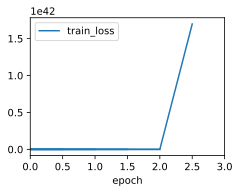

In [16]:
class LinearRegressionScratch(d2l.Module):  #@save
    """The linear regression model implemented from scratch."""
    def __init__(self, num_inputs, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.w = torch.normal(0, sigma, (num_inputs, 1), requires_grad=True)
        self.b = torch.zeros(1, requires_grad=True)

    def forward(self, X):
        return torch.matmul(X.double(), self.w.double()) + self.b.double()

    def loss(self, y_hat, y):
        l = (y_hat - y) ** 2 / 2
        return l.mean()

    def configure_optimizers(self):
        return SGD([self.w, self.b], self.lr)




class SGD(d2l.HyperParameters):  #@save
    """Minibatch stochastic gradient descent."""
    def __init__(self, params, lr):
        self.save_hyperparameters()

    def step(self):
        for param in self.params:
            param -= self.lr * param.grad

    def zero_grad(self):
        for param in self.params:
            if param.grad is not None:
                param.grad.zero_()




model = LinearRegressionScratch(data_tensor.shape[1], lr=0.03)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, my_data)

In [27]:
class LinearRegression(d2l.Module):  #@save
    """The linear regression model implemented with high-level APIs."""
    def __init__(self, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.LazyLinear(1)
        self.net.weight.data.normal_(0, 0.01)
        self.net.bias.data.fill_(0)

    def forward(self, X):
        return self.net(X)

    def loss(self, y_hat, y):
        fn = nn.MSELoss() # MSELoss returns the average loss over examples
        return fn(y_hat, y)

    def configure_optimizers(self):
        return torch.optim.SGD(self.parameters(), self.lr)

    '''def get_w_b(self):
        return (self.net.weight.data, self.net.bias.data)
        w, b = model.get_w_b()'''


model = LinearRegression(lr=0.03)
trainer = d2l.Trainer(max_epochs=3)
trainer.fit(model, my_data)

#proban2

#print(f'error in estimating w: {data.w - w.reshape(data.w.shape)}')
#print(f'error in estimating b: {data.b - b}')

RuntimeError: mat1 and mat2 must have the same dtype